In [1]:
# https://github.com/awslabs/amazon-sagemaker-examples/blob/master/scientific_details_of_algorithms/streaming_median/streamingMedian.py.ipynb

import numpy as np
import matplotlib.pyplot as plt

In [8]:
n = 100000
data = np.linspace(0,1,n)
np.random.shuffle(data)

In [9]:
def f(x, data):
    return sum(abs(x - datum) for datum in data)/len(data)

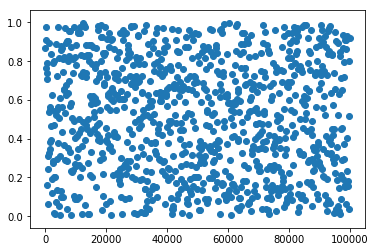

In [10]:
%matplotlib inline
plt.scatter(range(0,n,100), data[0:n:100],vmin=0,vmax=1.0)

In [11]:
# using sort (O(n log n))... drawback is stores in memory, also duplicate it
from math import floor
def batchMedian(data):
    n = len(data)
    median = sorted(data)[int(floor(n/2))]
    return median

In [12]:
median = batchMedian(data)
median

0.5000050000500005

C:\anaconda\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


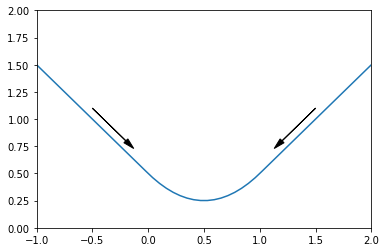

In [15]:
# streaming - one pass over data, can't store in memory
# Gradient Descent - in 1D, left if derivative is positive, right if negative
xs = list(np.linspace(-1.0,2.0,50))
ys = [f(x,data) for x in xs]
plt.plot(xs,ys)
plt.ylim((0.0,2.0))
plt.xlim((-1.0,2.0))
ax = plt.axes()
ax.arrow(-0.5,1.1,0.3,-0.3, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(1.5, 1.1, -0.3, -0.3, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.show()